In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#path = '/content/gdrive/My Drive/projek/'

In [ ]:
# dfTabel = pd.read_csv(path+'Employee.csv')
dfTabel = pd.read_csv('https://raw.githubusercontent.com/diimprasetyos/datasetku/main/Employee.csv')
# dfNlpGPT= pd.read_csv(path+'gpt.csv')
# dfNlpClothing = pd.read_csv(path+'Womens Clothing E-Commerce Reviews.csv')

In [ ]:
for column in dfTabel.columns:
  print(f"========= {column} ==========")
  display(dfTabel[column].value_counts())
  print()
print(dfTabel.info)

========= Education ==========


Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64


========= JoiningYear ==========


JoiningYear
2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: count, dtype: int64


========= City ==========


City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64


========= PaymentTier ==========


PaymentTier
3    3492
2     918
1     243
Name: count, dtype: int64


========= Age ==========


Age
26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
34    136
38    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: count, dtype: int64


========= Gender ==========


Gender
Male      2778
Female    1875
Name: count, dtype: int64


========= EverBenched ==========


EverBenched
No     4175
Yes     478
Name: count, dtype: int64


========= ExperienceInCurrentDomain ==========


ExperienceInCurrentDomain
2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: count, dtype: int64


========= LeaveOrNot ==========


LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64


<bound method DataFrame.info of       Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Ye

#EDA

###Analisis Deskriptif

In [ ]:
dfTabel.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [ ]:
dfTabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
dfTabel.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
dfTabel.duplicated().sum()

1889

In [ ]:
duplicated_row = dfTabel[dfTabel.duplicated()]
duplicated_row

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


In [ ]:
dfTabel.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [ ]:
dfTabel.describe(include=object)

,Education,City,Gender,EverBenched
count,4653,4653,4653,4653
unique,3,3,2,2
top,Bachelors,Bangalore,Male,No
freq,3601,2228,2778,4175


In [ ]:
for column in dfTabel.columns:
    unique_values = dfTabel[column].unique()
    print(f"Unique Values '{column}':")
    print(unique_values)
    print()

Unique Values 'Education':
['Bachelors' 'Masters' 'PHD']

Unique Values 'JoiningYear':
[2017 2013 2014 2016 2015 2012 2018]

Unique Values 'City':
['Bangalore' 'Pune' 'New Delhi']

Unique Values 'PaymentTier':
[3 1 2]

Unique Values 'Age':
[34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]

Unique Values 'Gender':
['Male' 'Female']

Unique Values 'EverBenched':
['No' 'Yes']

Unique Values 'ExperienceInCurrentDomain':
[0 3 2 5 1 4 7 6]

Unique Values 'LeaveOrNot':
[0 1]



###Visualisasi Data

####What is the distribution of educational among employees?

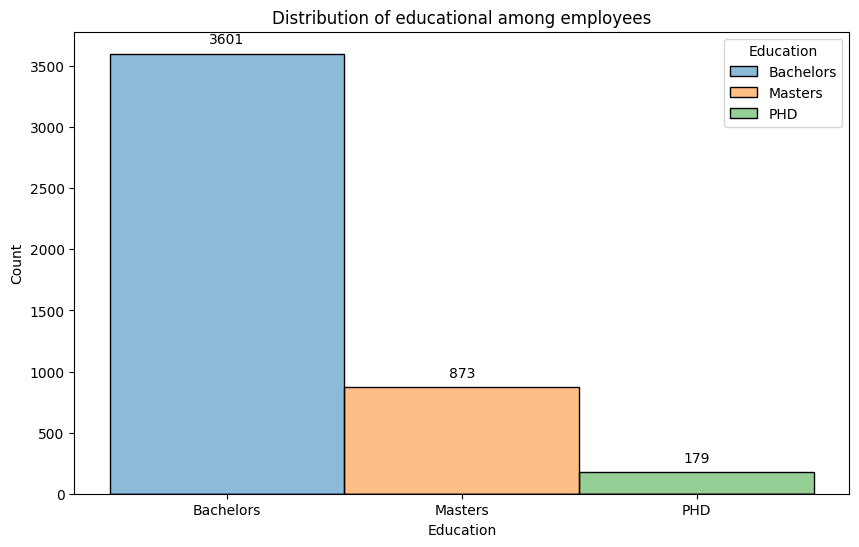

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(x='Education',data=dfTabel,kde=True,hue='Education')
plt.title('Distribution of educational among employees')

counts = dfTabel.Education.value_counts()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(f'{int(height)}',
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center',
                  xytext=(0, 10),
                  textcoords='offset points')

####What is the distribution of Gender among employees?

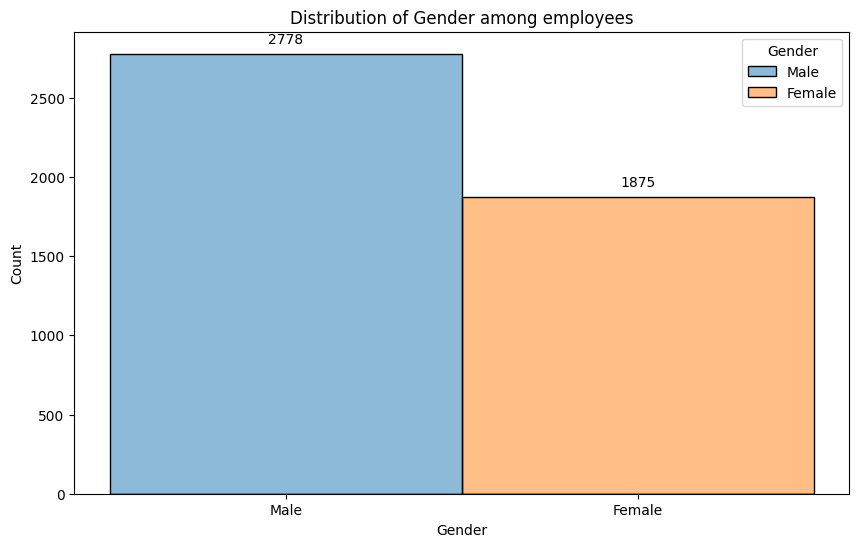

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(x='Gender',data=dfTabel,hue='Gender')
plt.title('Distribution of Gender among employees')

counts = dfTabel.Gender.value_counts()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
      ax.annotate(f'{int(height)}',
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center',
                  xytext=(0, 10),
                  textcoords='offset points')

####What is the distribution of Experience in Current Domain among Employee?

Text(0.5, 1.0, 'Distribution of Employee Experience in Current Domain')

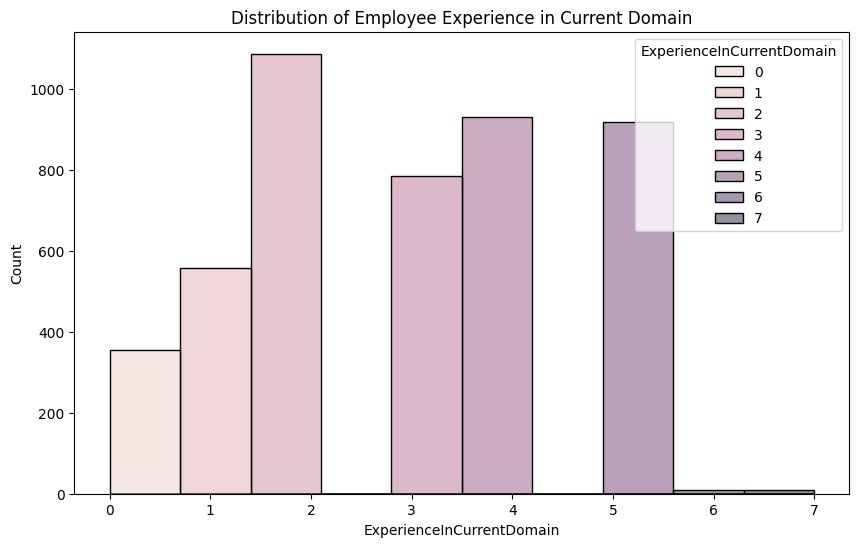

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='ExperienceInCurrentDomain',data=dfTabel, hue='ExperienceInCurrentDomain',bins=10, kde=True)
plt.title('Distribution of Employee Experience in Current Domain')

#Pre-processing

### Encoding

In [ ]:
le=LabelEncoder()
dfTabel["Education"]= le.fit_transform(dfTabel["Education"])
dfTabel["City"]=le.fit_transform(dfTabel["City"])
dfTabel["Gender"]=le.fit_transform(dfTabel["Gender"])
dfTabel["EverBenched"]=le.fit_transform(dfTabel["EverBenched"])

print("\nData after encoding categorical features:")
dfTabel.head()


Data after encoding categorical features:


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1


### Normalisasi

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# numerical_features = [ 'PaymentTier', 'ExperienceInCurrentDomain']
# dfTabel[numerical_features] = scaler.fit_transform(dfTabel[numerical_features])

In [ ]:
dfTabel

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,2,1,28,0,0,3,1
2,0,2014,1,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,0,0,4,0
4649,1,2013,2,2,37,1,0,2,1
4650,1,2018,1,3,27,1,0,5,1
4651,0,2012,0,3,30,1,1,2,0


### Pemilihan Fitur

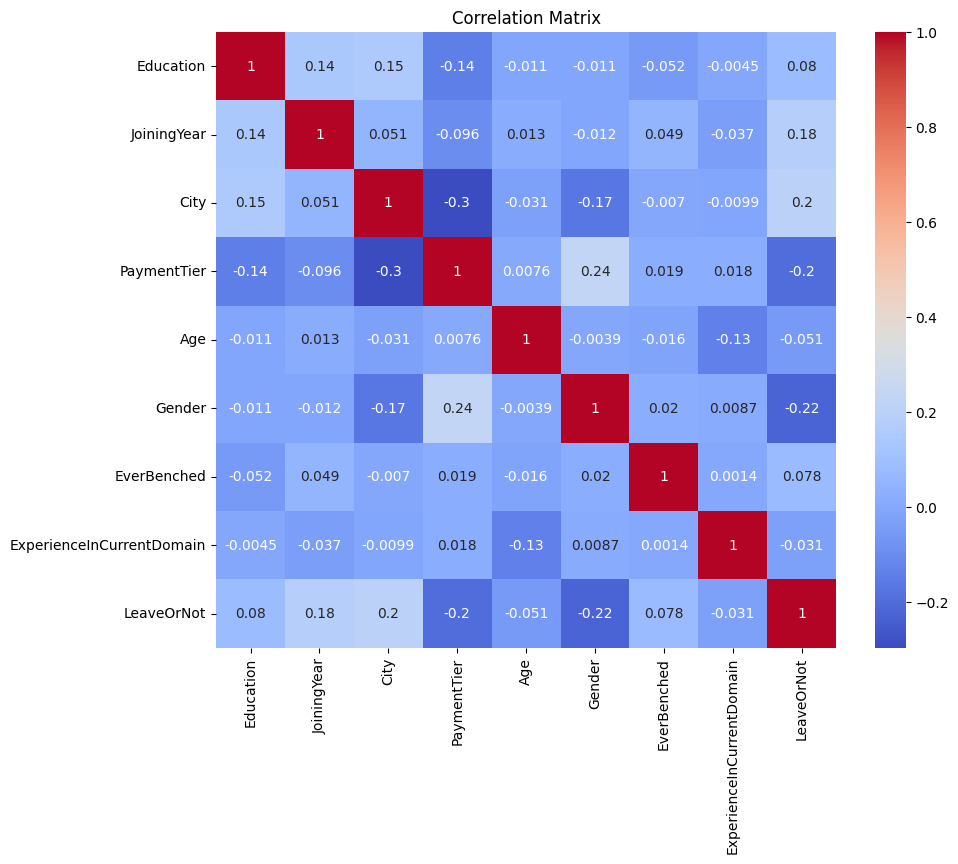


Features correlation with 'LeaveOrNot':
LeaveOrNot                   1.000000
Gender                       0.220701
City                         0.201058
PaymentTier                  0.197638
JoiningYear                  0.181705
Education                    0.080497
EverBenched                  0.078438
Age                          0.051126
ExperienceInCurrentDomain    0.030504
Name: LeaveOrNot, dtype: float64

Selected top features:
Index(['Gender', 'City', 'PaymentTier', 'JoiningYear', 'Education'], dtype='object')

Dataset with selected features:
   Gender  City  PaymentTier  JoiningYear  Education
0       1     0            3         2017          0
1       0     2            1         2013          0
2       0     1            3         2014          0
3       1     0            3         2016          1
4       1     2            3         2017          1


In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = dfTabel.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

target = 'LeaveOrNot'
correlation_with_target = correlation_matrix[target].abs().sort_values(ascending=False)
print("\nFeatures correlation with 'LeaveOrNot':")
print(correlation_with_target)

selected_features = correlation_with_target.index[1:6]
print("\nSelected top features:")
print(selected_features)

dfTabel_selected = dfTabel[selected_features]
print("\nDataset with selected features:")
print(dfTabel_selected.head())

Data telah dihitung korelasinya sehingga untuk menyederhanakan dataset, maka aakn dipilih 5 teratas.

In [ ]:
dfTabel = dfTabel.drop(columns =['EverBenched','Age','ExperienceInCurrentDomain'])
dfTabel.head()

,Education,JoiningYear,City,PaymentTier,Gender,LeaveOrNot
0,0,2017,0,3,1,0
1,0,2013,2,1,0,1
2,0,2014,1,3,0,0
3,1,2016,0,3,1,1
4,1,2017,2,3,1,1


Data Telah diencoding sedemikian rupa sehingga data sudah berupa angka dan dapat dihitung oleh komputer. Langkah selanjutnya adalah splitting data untuk dapat training model. Untuk algoritma yang digunakan adalah random forest, decicion tree, dan naive bayes.

In [ ]:
#Undersampling
from imblearn.under_sampling import RandomUnderSampler
X = dfTabel.drop(columns='LeaveOrNot')
y = dfTabel['LeaveOrNot']
#X = pd.get_dummies(X)
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


x_train, x_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42)


##Pemodelan menggunakan Decicion tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# modeling using decision tree
modelDT = DecisionTreeClassifier()
modelDT.fit(x_train,y_train)
y_pred = modelDT.predict(x_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       498
           1       0.88      0.71      0.79       462

    accuracy                           0.81       960
   macro avg       0.83      0.81      0.81       960
weighted avg       0.82      0.81      0.81       960



###hiperparameter tunning dengan grid

In [ ]:
from sklearn.model_selection import GridSearchCV

# Membuat parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']}
# Grid search
grid_search = GridSearchCV(estimator=modelDT, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.7861607142857142


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:

dtGS = DecisionTreeClassifier(**grid_search.best_params_)
dtGS.fit(x_train, y_train)

y_pred = dtGS.predict(x_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       498
           1       0.87      0.71      0.78       462

    accuracy                           0.81       960
   macro avg       0.82      0.81      0.81       960
weighted avg       0.82      0.81      0.81       960



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


###Hiperparameter tunning dengan RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'criterion': ['gini', 'entropy']
}

# Random search
random_search = RandomizedSearchCV(estimator=modelDT, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(x_train, y_train)

# Hasil terbaik
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8}
Best cross-validation score: 0.7839285714285714


In [ ]:


dtRS = DecisionTreeClassifier(**random_search.best_params_)
dtRS.fit(x_train, y_train)

y_pred =dtRS.predict(x_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       498
           1       0.88      0.72      0.79       462

    accuracy                           0.82       960
   macro avg       0.83      0.81      0.81       960
weighted avg       0.83      0.82      0.82       960



###HiperParameter tunning dengan hyperopt

In [ ]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Definisikan space parameter
space_dt = {
    'max_depth': hp.quniform('max_depth', 10, 30, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 11, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 5, 1),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

# Fungsi objektif
def objective_dt(params):
    dt = DecisionTreeClassifier(
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        criterion=params['criterion'],
        random_state=42
    )
    score = cross_val_score(dt, x_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Jalankan optimisasi
trials_dt = Trials()
best_dt = fmin(fn=objective_dt, space=space_dt, algo=tpe.suggest, max_evals=50, trials=trials_dt)

print(f"Best parameters for DecisionTree: {best_dt}")


100%|██████████| 50/50 [00:02<00:00, 22.30trial/s, best loss: -0.7852678571428572]
Best parameters for DecisionTree: {'criterion': 0, 'max_depth': 10.0, 'min_samples_leaf': 1.0, 'min_samples_split': 10.0}


In [ ]:
best_params = {key: int(value) if isinstance(value, float) else value for key, value in best_dt.items()}
if best_params['criterion'] == 1:
    best_params['criterion'] = 'entropy'
else:
    best_params['criterion'] = 'gini'
dtHO = DecisionTreeClassifier(**best_params)
dtHO.fit(x_train, y_train)

y_pred =dtHO.predict(x_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       498
           1       0.89      0.72      0.79       462

    accuracy                           0.82       960
   macro avg       0.83      0.82      0.82       960
weighted avg       0.83      0.82      0.82       960



##Pemodelan menggunakan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators=100, random_state=24)
modelRF.fit(x_train, y_train)

y_pred = modelRF.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       498
           1       0.87      0.72      0.79       462

    accuracy                           0.82       960
   macro avg       0.83      0.81      0.81       960
weighted avg       0.82      0.82      0.81       960



###Hiperparameter tunning dengan grid

In [ ]:
from sklearn.model_selection import GridSearchCV

# Membuat parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Grid search
grid_search = GridSearchCV(estimator=modelRF, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 30, 'n_estimators': 100}
Best score: 0.7906250000000001


In [ ]:


rfGS = RandomForestClassifier(**grid_search.best_params_)
rfGS.fit(x_train, y_train)

y_pred = rfGS.predict(x_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       498
           1       0.86      0.73      0.79       462

    accuracy                           0.81       960
   macro avg       0.82      0.81      0.81       960
weighted avg       0.82      0.81      0.81       960



###Hiperparameter tunning dengan random search


In [ ]:

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

random_search = RandomizedSearchCV(estimator=modelRF, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(x_train, y_train)

# Hasil terbaik
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

Best parameters: {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 50}
Best cross-validation score: 0.7879464285714286


In [ ]:


rfRS = RandomForestClassifier(**random_search.best_params_)
rfRS.fit(x_train, y_train)

y_pred =rfRS.predict(x_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       498
           1       0.87      0.73      0.79       462

    accuracy                           0.82       960
   macro avg       0.83      0.81      0.81       960
weighted avg       0.82      0.82      0.81       960



###Hiperparameter tunning dengan Hyperopt



In [ ]:

from sklearn.ensemble import RandomForestClassifier


# Definisikan space parameter
space_rf = {
    'n_estimators': hp.quniform('n_estimators', 100, 500, 1),
    'max_depth': hp.quniform('max_depth', 10, 30, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 11, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 5, 1),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2'])
}

# Fungsi objektif
def objective_rf(params):
    rf = RandomForestClassifier(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features'],
        random_state=42
    )
    score = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Jalankan optimisasi
trials_rf = Trials()
best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=50, trials=trials_rf)

print(f"Best parameters for RandomForest: {best_rf}")


  2%|▏         | 1/50 [00:04<03:22,  4.13s/trial, best loss: -0.7857142857142858]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

  4%|▍         | 2/50 [00:06<02:25,  3.03s/trial, best loss: -0.7857142857142858]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 10%|█         | 5/50 [00:20<03:24,  4.55s/trial, best loss: -0.7866071428571428]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 14%|█▍        | 7/50 [00:29<03:09,  4.42s/trial, best loss: -0.7866071428571428]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 16%|█▌        | 8/50 [00:30<02:21,  3.38s/trial, best loss: -0.7866071428571428]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 18%|█▊        | 9/50 [00:32<01:59,  2.92s/trial, best loss: -0.7866071428571428]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 22%|██▏       | 11/50 [00:39<02:01,  3.11s/trial, best loss: -0.7866071428571428]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 24%|██▍       | 12/50 [00:46<02:39,  4.20s/trial, best loss: -0.7866071428571428]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 32%|███▏      | 16/50 [00:53<01:18,  2.31s/trial, best loss: -0.7875]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 36%|███▌      | 18/50 [01:01<01:33,  2.93s/trial, best loss: -0.7875]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 48%|████▊     | 24/50 [01:19<01:04,  2.49s/trial, best loss: -0.7875]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 54%|█████▍    | 27/50 [01:28<01:06,  2.89s/trial, best loss: -0.7875]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 60%|██████    | 30/50 [01:34<00:46,  2.31s/trial, best loss: -0.7875]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 64%|██████▍   | 32/50 [01:43<01:00,  3.36s/trial, best loss: -0.7875]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 88%|████████▊ | 44/50 [02:14<00:17,  2.96s/trial, best loss: -0.7879464285714286]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

 90%|█████████ | 45/50 [02:18<00:15,  3.18s/trial, best loss: -0.7879464285714286]

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomF

100%|██████████| 50/50 [02:30<00:00,  3.01s/trial, best loss: -0.7883928571428571]
Best parameters for RandomForest: {'max_depth': 13.0, 'max_features': 2, 'min_samples_leaf': 4.0, 'min_samples_split': 9.0, 'n_estimators': 157.0}


In [ ]:
best_params = {key: int(value) if isinstance(value, float) else value for key, value in best_rf.items()}

rfHO = RandomForestClassifier(**best_params)
rfHO.fit(x_train, y_train)

y_pred = rfHO.predict(x_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       498
           1       0.86      0.73      0.79       462

    accuracy                           0.81       960
   macro avg       0.82      0.81      0.81       960
weighted avg       0.82      0.81      0.81       960



##Pemodelan menggunakan Bernouli Naive Bayes


In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Inisialisasi model Naive Bayes
modelNB = BernoulliNB()
# Latih model
modelNB.fit(x_train, y_train)
y_pred = modelNB.predict(x_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       498
           1       0.62      0.71      0.66       462

    accuracy                           0.65       960
   macro avg       0.66      0.66      0.65       960
weighted avg       0.66      0.65      0.65       960



### HiperParameter tunning dengan grid

In [ ]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False]
}
# Grid search
grid_search = GridSearchCV(estimator=modelNB, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'alpha': 0.1, 'binarize': 0.0, 'fit_prior': True}
Best score: 0.6388392857142857


In [ ]:


nbGS = BernoulliNB(**grid_search.best_params_)
nbGS.fit(x_train, y_train)

y_pred = nbGS.predict(x_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       498
           1       0.62      0.71      0.66       462

    accuracy                           0.65       960
   macro avg       0.66      0.66      0.65       960
weighted avg       0.66      0.65      0.65       960



### Hiperparameter tunning dengan randomsearch

In [ ]:
from scipy.stats import uniform

param_dist = {
    'alpha': uniform(0.1, 10.0),
    'binarize': uniform(0.0, 2.0)
}
# Random search
random_search = RandomizedSearchCV(estimator=modelNB, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(x_train, y_train)

# Hasil terbaik
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

Best parameters: {'alpha': 3.021697652419977, 'binarize': 0.8308285605413157}
Best cross-validation score: 0.6388392857142857


In [ ]:
nbRS = BernoulliNB(**random_search.best_params_)
nbRS.fit(x_train, y_train)

y_pred = nbRS.predict(x_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       498
           1       0.62      0.71      0.66       462

    accuracy                           0.65       960
   macro avg       0.66      0.66      0.65       960
weighted avg       0.66      0.65      0.65       960



### Hiperparameter tunning dengan Hyperopt

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Definisikan space parameter
space_bnb = {
    'alpha': hp.uniform('alpha', 0.1, 10.0),
    'binarize': hp.uniform('binarize', 0.0, 2.0)
}

# Fungsi objektif
def objective_bnb(params):
    bnb = BernoulliNB(
        alpha=params['alpha'],
        binarize=params['binarize']
    )
    score = cross_val_score(bnb, x_train, y_train, cv=5, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

# Jalankan optimisasi
trials_bnb = Trials()
best_bnb = fmin(fn=objective_bnb, space=space_bnb, algo=tpe.suggest, max_evals=50, trials=trials_bnb)

print(f"Best parameters for BernoulliNB: {best_bnb}")


100%|██████████| 50/50 [00:01<00:00, 26.70trial/s, best loss: -0.6388392857142857]
Best parameters for BernoulliNB: {'alpha': 1.5534248383148257, 'binarize': 0.6526099668879788}


In [ ]:
nbHO = BernoulliNB(**best_bnb)
nbHO.fit(x_train, y_train)

y_pred = nbHO.predict(x_test)

# show metric classification
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       498
           1       0.62      0.71      0.66       462

    accuracy                           0.65       960
   macro avg       0.66      0.66      0.65       960
weighted avg       0.66      0.65      0.65       960



##Pembuatan dashboard
Kita gunakan model dengan akurasi terbaik dan f1 score yang tidak terpaut jauh yaitu random forest dengan grid search.

In [ ]:
from google.colab import files

df_new = pd.read_csv('/content/selected_features.csv')
pred = rfGS.predict(df_new)


df_new['prediction'] = pred

 #Menyimpan hasil klasifikasi ke dalam file CSV
df_new.to_csv('hasil_klasifikasi.csv', index=False)

 Mengunduh file CSV ke komputer lokal
files.download('hasil_klasifikasi.csv')
